In [4]:
# ! conda install -c conda-forge ta --yes

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\George\anaconda3

  added / updated specs:
    - ta


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-22.11.1              |   py39hcbf5309_1         908 KB  conda-forge
    python_abi-3.9             |           2_cp39           4 KB  conda-forge
    ruamel.yaml-0.17.21        |   py39hb82d6ee_1         169 KB  conda-forge
    ruamel.yaml.clib-0.2.6     |   py39h2bbff1b_1         101 KB
    ta-0.10.2                  |     pyhd8ed1ab_0         1.6 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.7 MB

The following NEW packages will be INSTALLED:

  python_abi         conda-forge/win-64::python_abi-3.9-2_cp39 None
  ruamel.yaml        conda-forge/win-64::ruamel.yaml-0.17.21-py39hb82d6ee_1 None
  ru



==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.1.0

Please update conda by running

    $ conda update -n base -c defaults conda




==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.1.0

Please update conda by running

    $ conda update -n base -c defaults conda




Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\George\anaconda3

  added / updated specs:
    - ta


The following NEW packages will be INSTALLED:

  python_abi         conda-forge/win-64::python_abi-3.9-2_cp39 None
  ruamel.yaml        conda-forge/win-64::ruamel.yaml-0.17.21-py39hb82d6ee_1 None
  ruamel.yaml.clib   pkgs/main/win-64::ruamel.yaml.clib-0.2.6-py39h2bbff1b_1 None
  ta                 conda-forge/noarch::ta-0.10.2-pyhd8ed1ab_0 None

The following packages will be UPDATED:

  conda              pkgs/main::conda-22.9.0-py39haa95532_0 --> conda-forge::conda-22.11.1-py39hcbf5309_1 None


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done
Retrieving notices: ...working... done
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\George\anaconda3

  added / updated specs:
    - ta


The following NEW packages will be IN



==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.1.0

Please update conda by running

    $ conda update -n base -c defaults conda




In [3]:
import websocket
import requests
import json
import pandas as pd
import ta
import matplotlib.pyplot as plt
import math
import pytz

In [137]:
timezone = pytz.timezone("Asia/Taipei")
endpoint = 'wss://stream.binance.com:9443/ws'
symbol = 'ethusdt'
symbol_C = symbol.upper()
rate = 30
interval = '15m'
limit = 200

In [154]:
data = json.dumps({'method':'SUBSCRIBE','params':[symbol + '@kline_' + interval],'id':1})
df = pd.DataFrame()

In [155]:
def get_historical(symbol, interval, limit):
    url = "https://api.binance.com/api/v3/klines"
    params = {"symbol": symbol_C,
              "interval": interval,
              "limit": limit}
    response = requests.get(url, params=params).json()
    df = pd.DataFrame(response, columns = ["Open time", "Open", "High", "Low", "Close",
                                           "Volume", "Close time", "Quote asset volume",
                                           "Number of trades", "Taker buy base asset volume",
                                           "Taker buy quote asset volume", "Ignore"])
    df = df[['Close time', 'Open', 'Close', "High", "Low", 'Volume']]
    convert_dict = {'Open': float, 'Close': float, "High": float, "Low": float, 'Volume': float}
    df = df.astype(convert_dict)
    return df

In [156]:
df = get_historical(symbol, interval, limit)
df.index = df['Close time']
df.drop(['Close time'], axis =1, inplace=True)
df['Closed'] = True

print(df)

                  Open    Close     High      Low     Volume  Closed
Close time                                                          
1675950299999  1634.74  1637.60  1642.36  1634.73  4039.9161    True
1675951199999  1637.61  1640.15  1640.84  1636.50  2332.8964    True
1675952099999  1640.16  1639.69  1642.61  1639.68  5420.0842    True
1675952999999  1639.69  1642.80  1644.78  1639.06  3410.9020    True
1675953899999  1642.81  1636.53  1649.24  1635.97  8722.1726    True
...                ...      ...      ...      ...        ...     ...
1676125799999  1522.40  1521.00  1523.40  1520.99  2619.6516    True
1676126699999  1521.00  1520.99  1521.53  1519.16  2880.9596    True
1676127599999  1520.98  1525.51  1526.71  1520.98  4885.0767    True
1676128499999  1525.50  1523.97  1526.52  1523.46  3182.2072    True
1676129399999  1523.97  1524.90  1524.91  1523.78   370.6868    True

[200 rows x 6 columns]


In [10]:
def on_open(ws):
    ws.send(data)

def on_message(ws, message):
    global df, rate, limit
    out = json.loads(message)    
    out = pd.DataFrame({'Open':float(out['k']['o']),
                        'Close':float(out['k']['c']),
                        'High':float(out['k']['h']),
                        'Low':float(out['k']['l']),
                        'Volume':float(out['k']['v']),
                        'Closed':bool(out['k']['x']),
                        },
                        index=[out['E']])


    # out['Sma'] = sma.tail(1)[0]
    # out['Bb_U'] = bband_up.tail(1)[0]
    # out['Bb_D'] = bband_down.tail(1)[0]
    df = pd.concat([df,out], axis = 0)


    
    print(df)
    # df = df.tail(5)
    # df.drop(df[df['closed'] == False].index, axis=0, inplace=True)



In [11]:
ws = websocket.WebSocketApp(endpoint, on_message = on_message, on_open = on_open)
ws.run_forever()

                  Open    Close     High      Low     Volume  Closed
1676020499999  1550.83  1549.30  1552.53  1549.12  1729.5147    True
1676021399999  1549.29  1552.03  1552.10  1547.37  2316.3675    True
1676022299999  1552.02  1549.51  1552.19  1548.19  1683.2590    True
1676023199999  1549.52  1545.77  1551.00  1545.36  2139.1519    True
1676024099999  1545.76  1546.19  1546.82  1544.21  1853.6841    True
...                ...      ...      ...      ...        ...     ...
1676097899999  1517.86  1518.10  1519.26  1516.83  1264.1352    True
1676098799999  1518.10  1518.71  1518.71  1517.16  1551.6688    True
1676099699999  1518.70  1519.30  1520.45  1518.20  1871.2246    True
1676100599999  1519.31  1518.63  1519.52  1516.40  1255.4157    True
1676100476154  1519.31  1517.71  1519.52  1516.40  1346.0511   False

[91 rows x 6 columns]
                  Open    Close     High      Low     Volume  Closed
1676020499999  1550.83  1549.30  1552.53  1549.12  1729.5147    True
16760213999

False

In [157]:
def indicators(df):
#     sma
    sma_int = 30
    df['sma'] = ta.trend.sma_indicator(df.Close, window=sma_int)
#     bband
    bb_int = 30
    bb_dev = 2
    bb = ta.volatility.BollingerBands(df['Close'], window=bb_int, window_dev=bb_dev)
    df['bb_u'] = bb.bollinger_hband()
    df['bb_m'] = bb.bollinger_mavg()
    df['bb_l'] = bb.bollinger_lband()
#     rsi
    rsi_int = 14
    df['rsi'] = ta.momentum.RSIIndicator(df['Close'], window = rsi_int).rsi()
    df.dropna(inplace=True)
    return df

In [158]:
indicators(df)

,Open,Close,High,Low,Volume,Closed,sma,bb_u,bb_m,bb_l,rsi
Close time,,,,,,,,,,,
1675976399999,1579.99,1577.10,1582.45,1576.04,6751.0868,True,1617.383333,1664.358426,1617.383333,1570.408241,27.980587
1675977299999,1577.10,1571.02,1578.07,1568.41,7019.7317,True,1615.164000,1664.348044,1615.164000,1565.979956,25.721317
1675978199999,1571.02,1560.80,1574.21,1560.80,9062.5749,True,1612.519000,1664.498855,1612.519000,1560.539145,22.441199
1675979099999,1560.81,1544.51,1561.71,1526.02,42780.3438,True,1609.346333,1665.736967,1609.346333,1552.955700,18.410985
1675979999999,1544.52,1540.55,1546.06,1524.40,19846.1478,True,1605.938000,1666.065157,1605.938000,1545.810843,17.584253
...,...,...,...,...,...,...,...,...,...,...,...
1676125799999,1522.40,1521.00,1523.40,1520.99,2619.6516,True,1520.578000,1524.571620,1520.578000,1516.584380,51.629424
1676126699999,1521.00,1520.99,1521.53,1519.16,2880.9596,True,1520.634333,1524.601847,1520.634333,1516.666820,51.601749
1676127599999,1520.98,1525.51,1526.71,1520.98,4885.0767,True,1520.880000,1525.103720,1520.880000,1516.656280,61.616960


In [159]:
# for each row
# volume > previous volume 1.5x
# close > previous open
# low < lowerband
for index, row in df.iterrows():
    df['c1'] = df['Volume'] > df['Volume'].shift(1)
    df['c2'] = df['Close'] > df['Open'].shift(1)
    df['c3'] = df['Low'] < df['bb_l']

# set signal to True
df['signal'] = False
df.loc[df.c1 & df.c2 & df.c3, 'signal'] = True

# enter in next candle
df['openbuy'] = False

print(df)


                  Open    Close     High      Low      Volume  Closed  \
Close time                                                              
1675976399999  1579.99  1577.10  1582.45  1576.04   6751.0868    True   
1675977299999  1577.10  1571.02  1578.07  1568.41   7019.7317    True   
1675978199999  1571.02  1560.80  1574.21  1560.80   9062.5749    True   
1675979099999  1560.81  1544.51  1561.71  1526.02  42780.3438    True   
1675979999999  1544.52  1540.55  1546.06  1524.40  19846.1478    True   
...                ...      ...      ...      ...         ...     ...   
1676125799999  1522.40  1521.00  1523.40  1520.99   2619.6516    True   
1676126699999  1521.00  1520.99  1521.53  1519.16   2880.9596    True   
1676127599999  1520.98  1525.51  1526.71  1520.98   4885.0767    True   
1676128499999  1525.50  1523.97  1526.52  1523.46   3182.2072    True   
1676129399999  1523.97  1524.90  1524.91  1523.78    370.6868    True   

                       sma         bb_u         bb

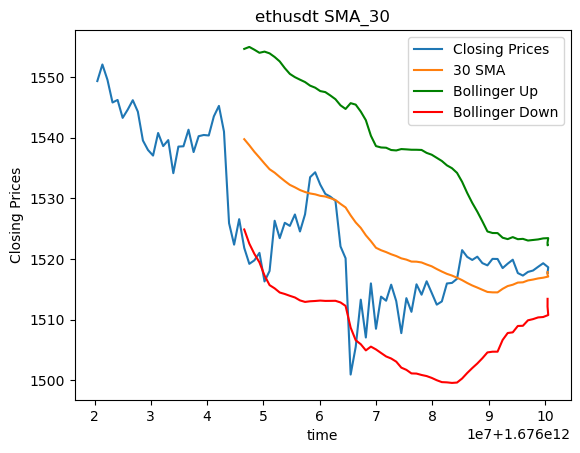

In [14]:
plt.title(symbol + ' SMA_' + str(rate))
plt.xlabel('time')
plt.ylabel('Closing Prices')
plt.plot(df.Close, label='Closing Prices')
plt.plot(sma, label= str(rate) + ' SMA')
plt.plot(bband_up, label='Bollinger Up', c='g')
plt.plot(bband_down, label='Bollinger Down', c='r')
plt.legend()
plt.show()